Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


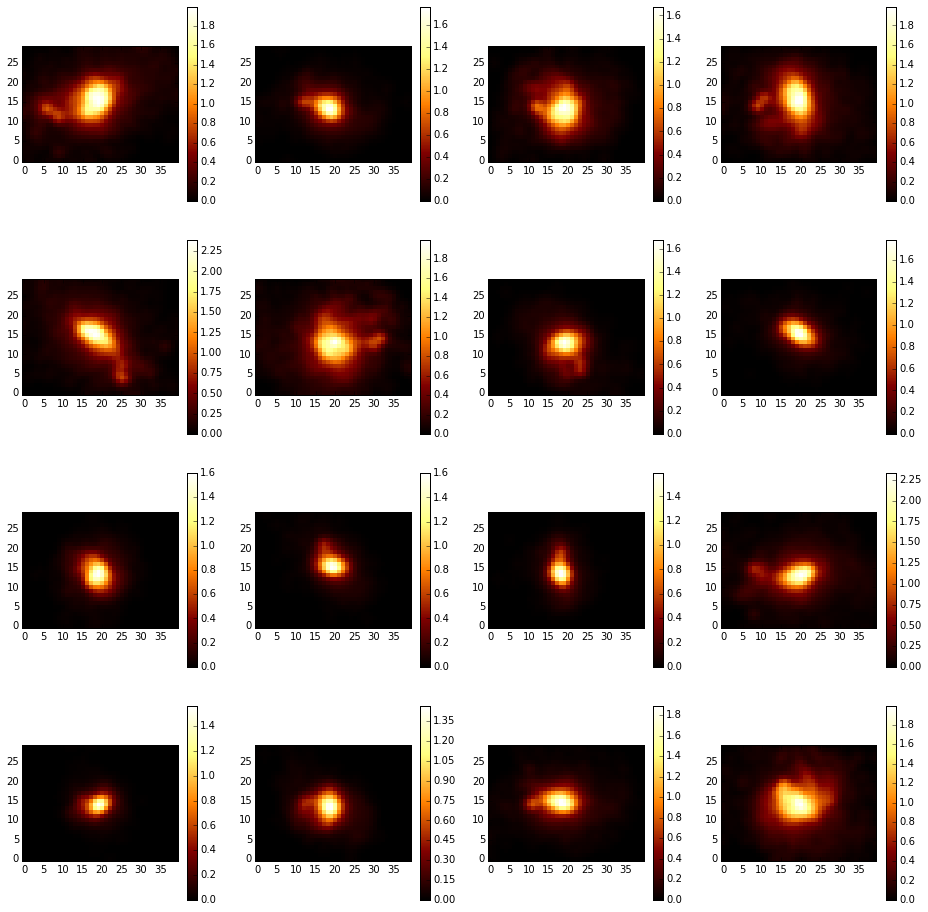

In [19]:
%pylab inline

import numpy
import astrohack_projections
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

file_path = "./illustris_galaxies/cutout_83.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((30, 40))

for i in xrange(16):
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 10
    scale = 0.2 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(13., 16.)
    yshift = numpy.random.uniform(18., 21.)
    psf_size = 1
    bg = 0.
    
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image(xi_hat, eta_hat)
    
    plt.subplot(4, 4, i+1)
    a, mid = numpy.percentile(illustris_gal.get_image(), [15., 85.])
    ran = mid - a
    vmin = mid - 5. * ran
    vmax = mid + 20. * ran
    plt.imshow(numpy.sqrt(illustris_gal.get_image()), **plot_kwargs)
    plt.colorbar()

In [50]:
# create an album of 32 such objects with random projection + normaly distributed noise

# plot parameters
plt.rcParams['figure.figsize'] = 16, 16
plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}

# initial galaxy data
file_path = "./illustris_galaxies/cutout_83.hdf5"
illustris_gal = astrohack_projections.illustris_model_and_image(file_path)
illustris_gal.set_image_shape((30, 40))

# album and PSF initialisation
album = astrohack_projections.album_and_model()
psf = astrohack_projections.mixture_of_gaussians(2)
psf.add_gaussian(1., numpy.array([0., 0.]), numpy.eye(2)*1.)

# galaxy model I fit with
basevar = 0.5 * numpy.eye(3)
gal_model = astrohack_projections.galaxy_model_3d()
v = [3., 0., 0.]
gal_model.add_gaussian(1.0, numpy.array([0., -1., 0.]), basevar + numpy.outer(v,v))
v = [-1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([2., 1., 0.]), basevar + numpy.outer(v,v))
v = [1., 3., 0.]
gal_model.add_gaussian(1.0, numpy.array([-2., 1., 0.]), basevar + numpy.outer(v,v))

for i in xrange(32):
    # projection parameters
    xi_hat, eta_hat = astrohack_projections.choose_random_projection()
    alpha, beta, gamma = numpy.random.uniform(0.0, 360.0, 3)
    intensity = 150
    scale = 0.18 * numpy.exp(numpy.random.uniform())
    xshift = numpy.random.uniform(13., 16.)
    yshift = numpy.random.uniform(18., 21.)
    psf_size = 1
    bg = 0.
    # illustris galaxy
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0, 'psf_size':psf_size}
    illustris_gal.set_image_parameters(**kwargs)
    illustris_gal.construct_image(xi_hat, eta_hat)
    # image
    image = astrohack_projections.image_and_model()
    image.set_shape((30, 40))
    image.set_psf(psf)
    kwargs = {'alpha':alpha, 'beta':beta, 'gamma':gamma, 'intensity':intensity, 'scale':scale, 'xshift': xshift, 'yshift': yshift, 'bg':0.0}
    image.set_parameters(**kwargs)
    image.set_galaxy(gal_model)
    image.set_ivar(numpy.ones(image.get_shape()))
    image.set_data(illustris_gal.get_image() + numpy.random.normal(size=image.get_shape())/ numpy.sqrt(image.ivar))
    # album
    album.add_image(image)
    
print len(album)

32


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


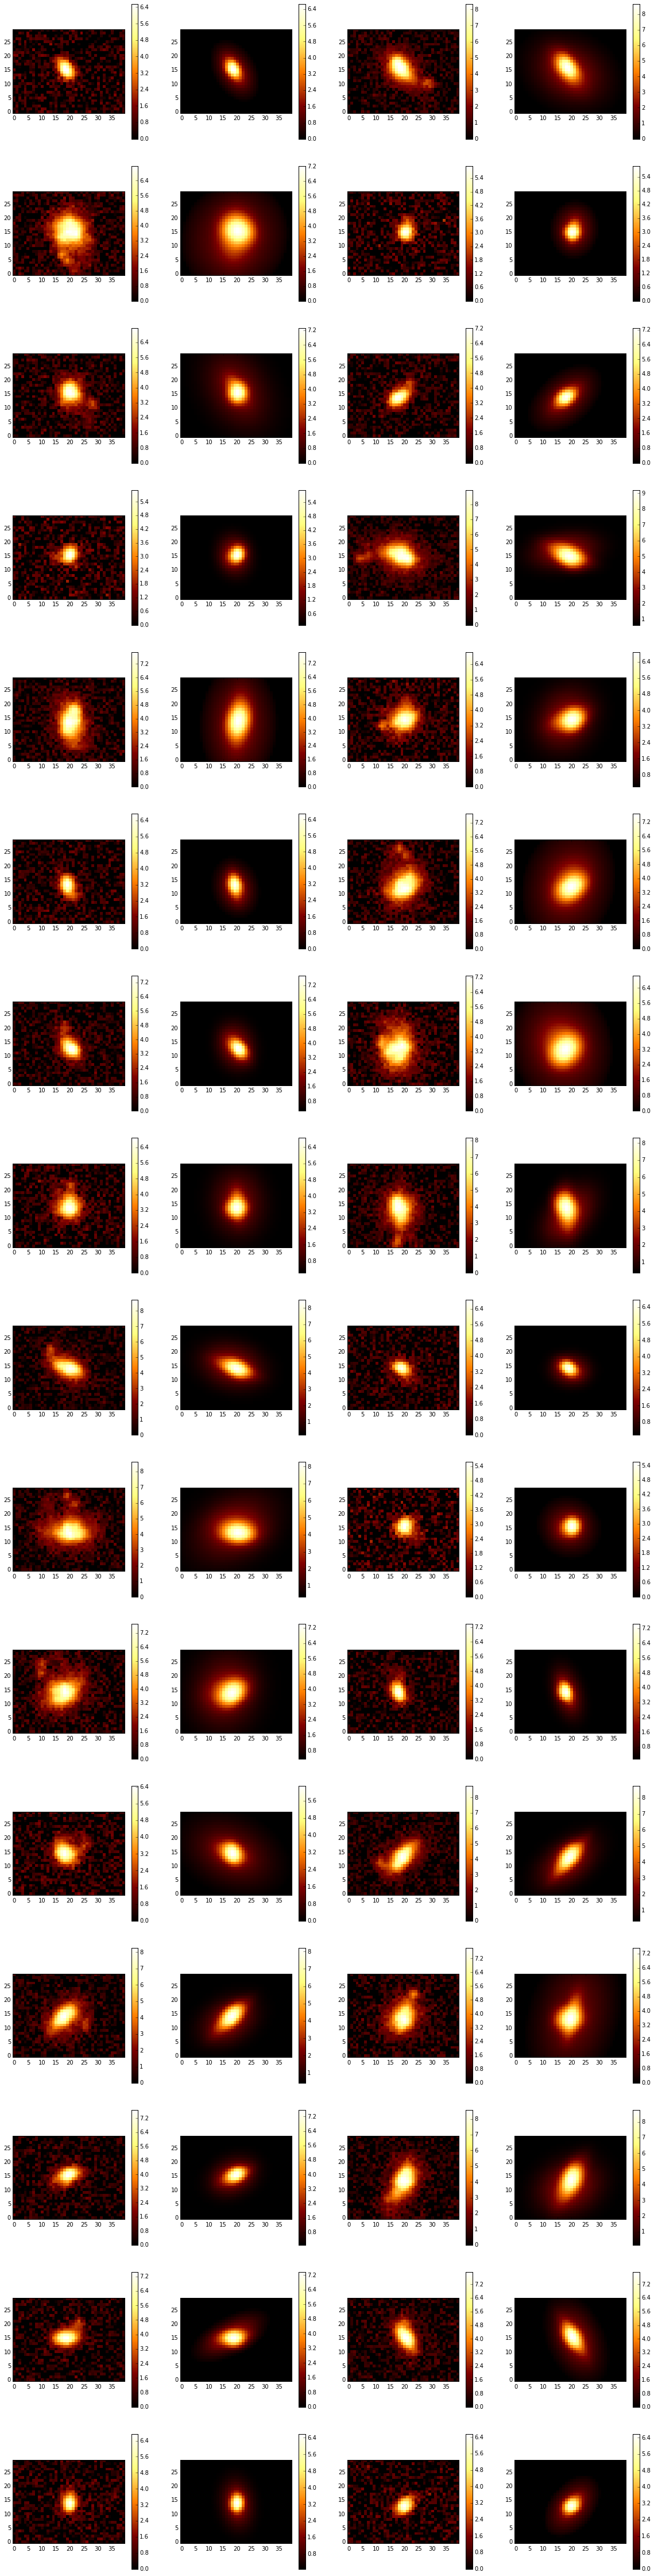

In [56]:
def showme(album):
    plt.rcParams['figure.figsize'] = 20, 80
    plot_kwargs = {"interpolation": "nearest",
          "cmap": "afmhot",
          "origin": "lower"}
    for i in xrange(len(album)):
        image = album.get_all_images()[i]
        plt.subplot(16, 4, 2*i+1)
        vmin = -5. / numpy.sqrt(numpy.median(image.get_ivar())) # assumes bg = 0
        vmax = -2. * vmin # assumes bg = 0
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_data())), **plot_kwargs)
        plt.colorbar()
        plt.subplot(16, 4, 2*i+2)
        plt.imshow(numpy.nan_to_num(numpy.sqrt(image.get_synthetic())), **plot_kwargs)
        plt.colorbar()
        
showme(album)

album before 1860197.46974
image before 19298.82477
image before 97702.7223512
image before 89949.033008
image before 11387.7683301
image before 41428.5533925
image before 30936.5970886
image before 11654.9443001
image before 154203.417843
image before 102767.585732
image before 45630.3478189
image before 18467.2655264
image before 92563.2513167
image before 38777.8636104
image before 81959.3490498
image before 33987.5268897
image before 99825.7726065
image before 82931.5798734
image before 17501.7373829
image before 116753.303508
image before 10686.6666589
image before 75227.7496407
image before 26551.6558907
image before 23918.624706
image before 103180.246448
image before 78170.6401198
image before 69474.3636449
image before 35246.4298841
image before 125421.943702
image before 36287.3092934
image before 58926.8902145
image before 15664.8716304
image before 17091.7531003


/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


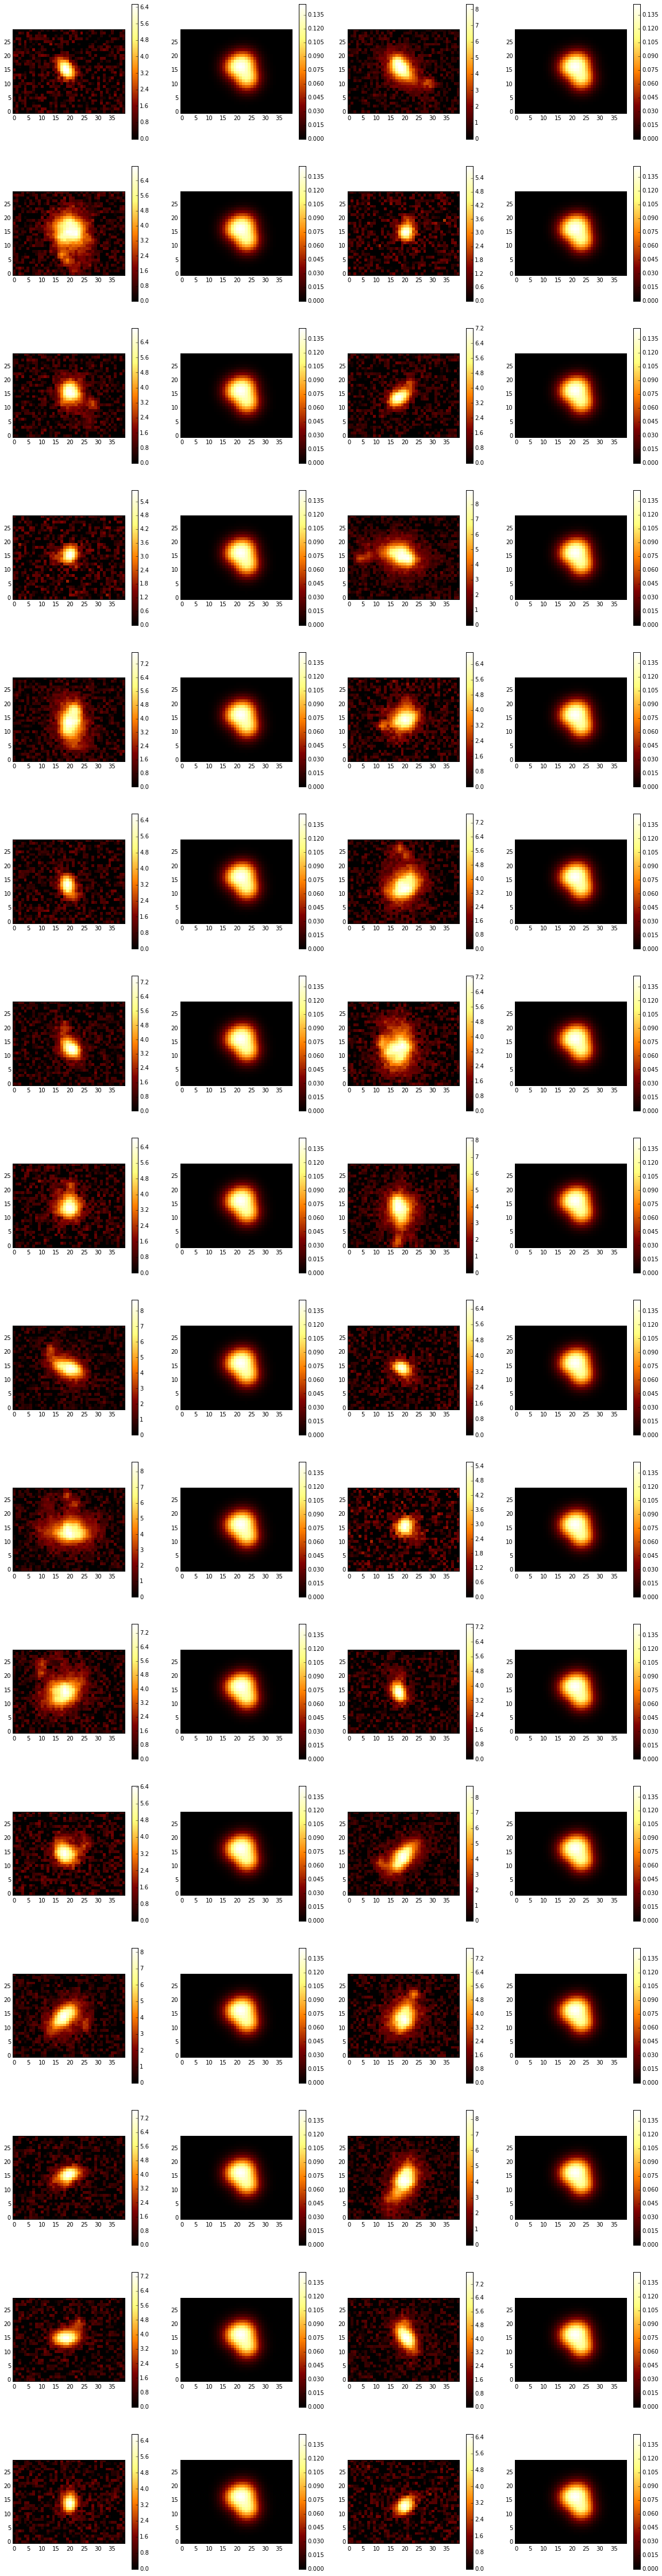

In [57]:
# INITIALIZATION BLOCK!
import scipy.optimize as op

galpar0 = numpy.array([1., 2., 0., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 2., 0., 1., 1., 1., 0., 0., 0.,
                       1., 0., 0., 2., 1., 1., 1., 0., 0., 0.])
imgpar0 = (10., 30., 30., 0.1, 0.5, 14., 20., 0.)

print "album before", album(galpar0)
for image in album:
    print "image before", image(imgpar0)
    
showme(album)
plt.savefig("./fitting_pngs/illustris_083/initialisation.pdf")

In [58]:
# run the thing!
num_runs = 8

for i in xrange(num_runs):
    # album optimisation
    galpar0 = album.galaxy.get_parameters_vector()
    print "album before", album(galpar0)
    result = op.minimize(album, galpar0, method="Powell")
    galpar = result['x']
    print "album after", album(galpar)
    
    showme(album)
    plt.savefig("./fitting_pngs/illustris_083/run_%s_album.pdf" % str(2*i).zfill(2))
    plt.close()
    
    # image optimisation
    for image in album:
        imgpar0 = image.get_parameters_vector()
        print "image before", image(imgpar0)
        result = op.minimize(image, imgpar0)
        imgpar = result['x']
        print "image after", image(imgpar)

    showme(album)
    plt.savefig("./fitting_pngs/illustris_083/run_%s_image.pdf" % str(2*i+1).zfill(2))
    plt.close()

album before 1863576.58933
album after 582269.912151
image before 14455.720453
image after 1717.50466043
image before 28602.2898288
image after 4944.59088682
image before 19816.4338326
image after 3423.94874122
image before 17669.5815355
image after 1223.75830983
image before 10574.8877652
image after 1792.17473099
image before 11607.5974148
image after 2482.28887554
image before 17013.0974819
image after 1322.23558068
image before 49042.5493299
image after 8756.79880012
image before 26397.4568172
image after 7778.8994162
image before 3791.02997382
image after 1987.00527902
image before 13308.358738
image after 1535.19666695
image before 25963.8552794
image after 4965.78329053
image before 14624.8069364
image after 1955.62179569
image before 25741.2971665
image after 3849.14376427
image before 3565.31733636
image after 1713.89301901
image before 26336.2798429
image after 4245.26555475
image before 15570.7519591
image after 5633.42243305
image before 11571.5762551
image after 1381.55757

/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt
/Users/dalyabaron/.virtualenvs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


 1430.76763135
album before 110916.3151
album after 80085.7054117
image before 1379.57143944
image after 1357.72154438
image before 2896.04057785
image after 2666.96861188
image before 4040.59801768
image after 3414.67387133
image before 1233.88345297
image after 1170.89452018
image before 2170.90247918
image after 1865.16257562
image before 1672.52204389
image after 1589.50985523
image before 1293.60840902
image after 1270.29961304
image before 6691.9671135
image after 5062.76858823
image before 4376.21883196
image after 3555.9433996
image before 1975.34834151
image after 1775.25284998
image before 1289.34066395
image after 1277.39533458
image before 3861.75666728
image after 3272.56244527
image before 1615.60323864
image after 1560.908559
image before 3928.37725601
image after 3543.7198198
image before 1824.6164147
image after 1628.32553874
image before 3154.91180877
image after 2907.42636994
image before 3408.40724207
image after 2530.14237516
image before 1260.87205094
image after 